In [6]:
import os
from google.colab import drive

#uncomment the line below if you have updated your Google drive (folder name, etc.) and need to remount
#drive.flush_and_unmount()

drive.mount('/content/drive')
os.chdir("drive/My Drive/Colab Notebooks")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


FileNotFoundError: [Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks'

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

faces = pd.read_csv('face_data.csv')

print(faces.shape)

(400, 4097)


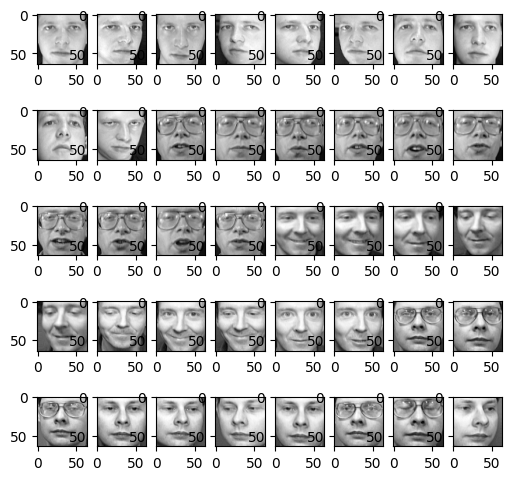

In [8]:
def plot_faces(pixels, nRows,nCols):
    fig, axes = plt.subplots(nRows, nCols, figsize=(6, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
    plt.show()

X = faces.drop('target', axis=1)
y = faces['target']

# display the first nRows*nCols of faces in the dataset
plot_faces(X, 5, 8)

(4096,)


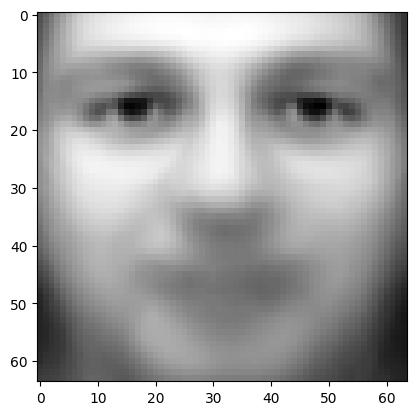

In [9]:
mean_X = X.mean(axis=0)

print(mean_X.shape)

faceplot = plt.imshow(np.array(mean_X).reshape(64, 64), cmap='gray')

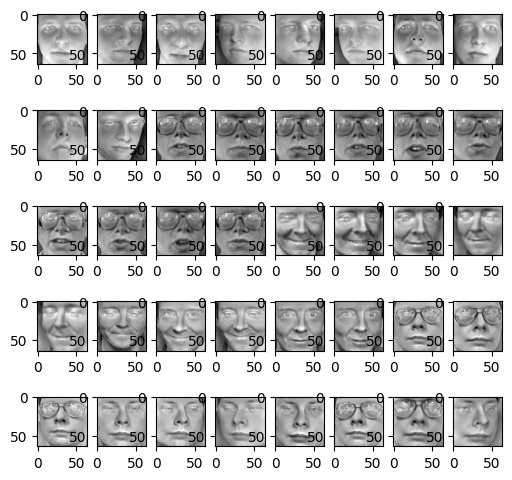

In [10]:
zeromean_X = X - mean_X

plot_faces(zeromean_X, 5, 8)

In [11]:
from sklearn.decomposition import PCA

# reduce to 20 dimensional weight vector to represent each face; dimension reduction from 4096 to 20; input to PCA is centered but not scaled
pca = PCA(n_components=20)
pca.fit(zeromean_X)

PCA(n_components=20)

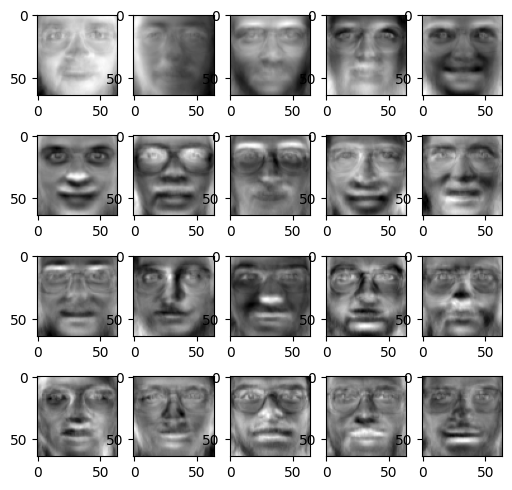

In [12]:
eigenfaces = pca.components_

plot_faces(eigenfaces, 4, 5)

In [13]:
zeromean_X_pca = pca.transform(zeromean_X)

print(zeromean_X_pca.shape)

(400, 20)


In [ ]:
print(eigenfaces.shape)
print(zeromean_X_pca.shape)

reconstructed_zeromean_X = np.matmul(zeromean_X_pca, eigenfaces)

mean_matrix = np.tile(mean_X, (400,1))

reconstructed_X = reconstructed_zeromean_X + mean_matrix

plot_faces(reconstructed_X, 5, 8)


In [ ]:
diff = X - reconstructed_X
plot_faces(diff, 5, 8)

In [ ]:
diff_norm = np.linalg.norm(diff, axis=1)

print(np.max(diff_norm))

In [ ]:
from sklearn.decomposition import PCA

# reduce to 20 dimensional weight vector to represent each face; dimension reduction from 4096 to 20; input to PCA is centered but not scaled
pca = PCA(n_components=150)
pca.fit(zeromean_X)

zeromean_X_pca = pca.transform(zeromean_X)

eigenfaces = pca.components_

plot_faces(eigenfaces, 15, 10)

reconstructed_zeromean_X = np.matmul(zeromean_X_pca, eigenfaces)

mean_matrix = np.tile(mean_X, (400,1))

reconstructed_X = reconstructed_zeromean_X + mean_matrix

plot_faces(reconstructed_X, 5, 8)

diff = X - reconstructed_X
plot_faces(diff, 5, 8)

diff_norm = np.linalg.norm(diff, axis=1)

print(np.max(diff_norm))

In [ ]:
eigenface_ID = 0;

face = eigenfaces[eigenface_ID]
s = pca.singular_values_[eigenface_ID]
s_row = np.ones(4096)*s

f0= np.array(mean_X) - np.array(face)*np.array(2*s_row)
f1 = np.array(mean_X) - np.array(face)*np.array(s_row)
f2 = np.array(mean_X)
f3 = np.array(mean_X) + np.array(face)*np.array(s_row)
f4 = np.array(mean_X) + np.array(face)*np.array(2*s_row)

f=np.vstack((f0.T,f1.T,f2.T,f3.T,f4.T))

plot_faces(f, 5,1)

In [ ]:
eigenface_ID = 1;

face = eigenfaces[eigenface_ID]
s = pca.singular_values_[eigenface_ID]
s_row = np.ones(4096)*s

f0= np.array(mean_X) - np.array(face)*np.array(2*s_row)
f1 = np.array(mean_X) - np.array(face)*np.array(s_row)
f2 = np.array(mean_X)
f3 = np.array(mean_X) + np.array(face)*np.array(s_row)
f4 = np.array(mean_X) + np.array(face)*np.array(2*s_row)

f=np.vstack((f0.T,f1.T,f2.T,f3.T,f4.T))

plot_faces(f, 5,1)


In [ ]:
eigenface_ID = 2;

face = eigenfaces[eigenface_ID]
s = pca.singular_values_[eigenface_ID]
s_row = np.ones(4096)*s

f0= np.array(mean_X) - np.array(face)*np.array(2*s_row)
f1 = np.array(mean_X) - np.array(face)*np.array(s_row)
f2 = np.array(mean_X)
f3 = np.array(mean_X) + np.array(face)*np.array(s_row)
f4 = np.array(mean_X) + np.array(face)*np.array(2*s_row)

f=np.vstack((f0.T,f1.T,f2.T,f3.T,f4.T))

plot_faces(f, 5,1)

In [ ]:
eigenface_ID = 3;

face = eigenfaces[eigenface_ID]
s = pca.singular_values_[eigenface_ID]
s_row = np.ones(4096)*s

f0= np.array(mean_X) - np.array(face)*np.array(2*s_row)
f1 = np.array(mean_X) - np.array(face)*np.array(s_row)
f2 = np.array(mean_X)
f3 = np.array(mean_X) + np.array(face)*np.array(s_row)
f4 = np.array(mean_X) + np.array(face)*np.array(2*s_row)

f=np.vstack((f0.T,f1.T,f2.T,f3.T,f4.T))

plot_faces(f, 5,1)